## Support Vector Machine (SVM)

Creating an SVM is like seeing a scatterplot of data identifying multiple things, and drawing a line dividing them. So if you have Iris pedal lengths and widths, and you want to identify which flower is which, you would draw a line inbetween the groupings to divide.

SVM does this mathmetically by drawing a line dividing groups, and then widening that line to max width. By rotating and moving the line, you keep making it bigger until the wide parallel lines are touching tangent to the closest observations of the group. This line becomes the decision line.

Hard margin SVM refers to a line on which no outliers can cross. So any data set with slightly mixed observations or large outliers will through problems or even errors with a HM SVM.

This is set by using `C` as `float(\"inf\")`

### Soft Margin

Soft margin is more flexible and draws a best fit line.

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [19]:
# Get data
iris_data = datasets.load_iris()

In [20]:
# Set data
X = iris_data['data'][:,(2,3)] #only load the width and length
y = (iris_data['target'] ==2).astype(np.float64)

In [21]:
# building the model outside the pipe in order to graph below
svm_model = LinearSVC(C=1, loss="hinge")
scaler = StandardScaler()
# build the pipe and model 
svm_pipe = Pipeline([
    ('scalar', scaler),
    ('linear_svm', svm_model) #C is a regularizer. The lower the more regularization
])



In [22]:
svm_pipe.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svm', LinearSVC(C=1, loss='hinge'))])

In [23]:
# Not target 2, Virginica
svm_pipe.predict([[5, 1.2]])

array([0.])

### Plotting the Decision Boundary

In [24]:
# SVM essentially creates a line, which is y = mx +b. 
# The scaler uses the mean to scale all values before training
# So to get the line, we need to get the trained m and b and unscale them
b = svm_model.decision_function([-scaler.mean_ / scaler.scale_])
m = svm_model.coef_[0] / scaler.scale_
svm_model.intercept_ = np.array([b])
svm_model.coef_ = np.array([m])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx = (t * (X.dot(m) + b) < 1).ravel()
svm_model.support_vectors_ = X[support_vectors_idx]

In [25]:
def plot_svc_decision_boundary(svm_model, xmin, xmax):
    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_model.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

(4.0, 5.9, 0.8, 2.8)

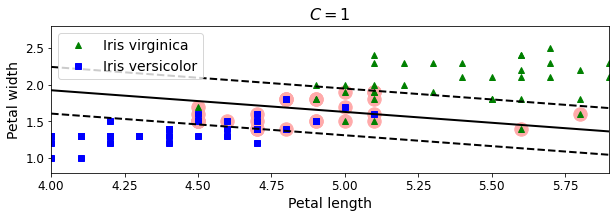

In [26]:
fig, axes = plt.subplots(ncols=1, figsize=(10,2.7), sharey=True)

#plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_model, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_model.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

